<a href="https://colab.research.google.com/github/bernardoabelo/Pandas-Library/blob/main/Analise_de_Dados_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
vendas=pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [5]:
#informação
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [6]:
vendas.groupby('idcanalvenda').idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


In [7]:
#unindo app e aplicativo na mesma coisa
vendas['idcanalvenda']=vendas['idcanalvenda'].str.replace('APP','Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique()


,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [8]:
#Ver as categorias que tenho para o nome do departamento
vendas.groupby('Nome_Departamento').idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [9]:
#Substituindo o " " pelo "_" em Nome_Departamento
vendas['Nome_Departamento']=vendas['Nome_Departamento'].str.replace(' ','_')
vendas.groupby('Nome_Departamento').idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [10]:
#Trocando os estados nulos por MS
vendas,vendas['estado'].fillna('MS',inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-10-d6c1e2efb684>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas,vendas['estado'].fillna('MS',inplace=True)


In [11]:
#Substituir o preço pela media de todos os preços
media_preço=vendas['Preço'].mean()
vendas['Preço'].fillna(media_preço,inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-11-cb8ada0fb23e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas['Preço'].fillna(media_preço,inplace=True)


In [12]:
#dando describe nas colunas Preço e Preço_com_frete
vendas[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [13]:
#toda vez que o Preço > Preço_com_frete elimine toda toda a linha
vendas=vendas.loc[vendas['Preço']<vendas['Preço_com_frete'],:]
vendas.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [14]:
#selecionando a query pra analise em Nome_Departamento sendo Esporte_e_lazer e o estado sendo SP
vendas.query( 'Nome_Departamento=="Esporte_e_Lazer" & estado=="SP"').describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [15]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [16]:
#Departamentos mais vendidos (quantidade de vendas por departamento)
vendas.groupby("Nome_Departamento")["idcompra"].count().reset_index().rename(columns={"idcompra": "Quantidade_Vendas"}).reset_index()




,index,Nome_Departamento,Quantidade_Vendas
0,0,Acessorios_e_Inovacoes,1251
1,1,Alimentos,2
2,2,Ar_e_Ventilacao,339
3,3,Audio,374
4,4,Automotivo,459
5,5,Bebes,4448
6,6,Beleza_e_Saude,1059
7,7,Brinquedos,686
8,8,"Cama,_Mesa_e_Banho",71
9,9,Casa_e_Construcao,58


In [17]:
#Média de preço com frete por departamento
vendas.groupby("Nome_Departamento")["Preço_com_frete"].mean().rename("Media_Preco_Frete").reset_index()



,Nome_Departamento,Media_Preco_Frete
0,Acessorios_e_Inovacoes,229.136192
1,Alimentos,104.236000
2,Ar_e_Ventilacao,518.794714
3,Audio,480.345882
4,Automotivo,681.570336
5,Bebes,130.899459
6,Beleza_e_Saude,119.586327
7,Brinquedos,176.447883
8,"Cama,_Mesa_e_Banho",210.701859
9,Casa_e_Construcao,433.527724


In [18]:
#Quantidade de vendas por mes
vendas["Data"] = pd.to_datetime(vendas["Data"])  # Garantir que seja uma data válida
vendas["Mes"] = vendas["Data"].dt.to_period("M")  # Criar coluna com o mês/ano

vendas.groupby("Mes")["idcompra"].count().rename("Quantidade_Vendas").reset_index()


,Mes,Quantidade_Vendas
0,2023-01,5458
1,2023-02,5266
2,2023-03,5733
3,2023-04,5590


In [19]:
#Media de renda por canal de venda
vendas.groupby("idcanalvenda")["Preço_com_frete"].mean().rename("Media_Renda").reset_index()


,idcanalvenda,Media_Renda
0,Aplicativo,614.570064
1,Internet,582.416536
2,Mobile,528.220215


In [20]:
#Media de clientes por bandeira
vendas.groupby("bandeira")["cliente_Log"].mean().rename("Media_Idade").reset_index()


,bandeira,Media_Idade
0,A,13751.956051
1,B,13981.275092


In [21]:
#Lendo a segunda base
cliente = pd.read_excel('/content/cliente_varejo.xlsx')
cliente.head().reset_index()

,index,cliente_Log,idade,renda
0,0,15042,89,11337
1,1,17590,54,2050
2,2,15478,47,8258
3,3,2933,39,4671
4,4,19790,26,9207


In [22]:
#transformando a renda de int pra float
cliente['renda'] = cliente['renda'].astype(float)
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [23]:
# Fazendo a junção dos datasets usando o cliente_Log como chave
vendas = vendas.merge(
    cliente[["cliente_Log", "idade", "renda"]],  # Seleciona apenas as colunas necessárias da base clientes
    on="cliente_Log",  # Define a chave de junção entre os datasets
    how="left"  # Mantém todas as linhas do dataset vendas e adiciona idade/renda quando houver correspondência
)
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,2023-03,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2023-02,78,6596.0


In [24]:
vendas.groupby("idcanalvenda")["renda"].mean().rename("Media_Renda").reset_index()


,idcanalvenda,Media_Renda
0,Aplicativo,8244.851376
1,Internet,8211.844949
2,Mobile,8222.717801


In [25]:
vendas.groupby("bandeira")["idade"].mean().rename("Media_Idade").reset_index()


,bandeira,Media_Idade
0,A,53.303003
1,B,53.287576


In [26]:
import matplotlib.pyplot as plt

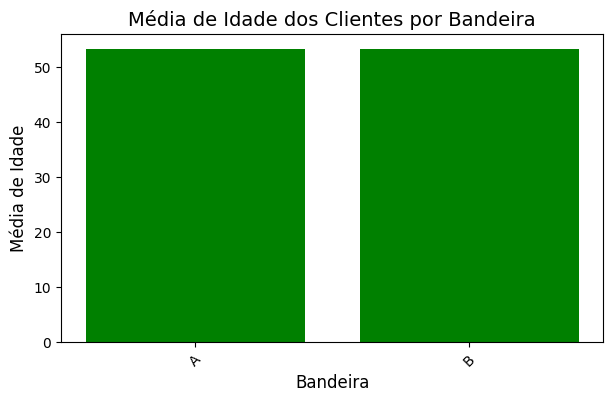

In [27]:
#definindo a resposta
media_idade_bandeira = vendas.groupby("bandeira")["idade"].mean().rename("Media_Idade").reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(7, 4))  # Define o tamanho da figura
plt.bar(media_idade_bandeira["bandeira"], media_idade_bandeira["Media_Idade"], color="green")

# Adicionar título e rótulos
plt.title("Média de Idade dos Clientes por Bandeira",loc='center', fontsize=14)
plt.xlabel("Bandeira", fontsize=12)
plt.ylabel("Média de Idade", fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os nomes das bandeiras se necessário

# Exibir o gráfico
plt.show()

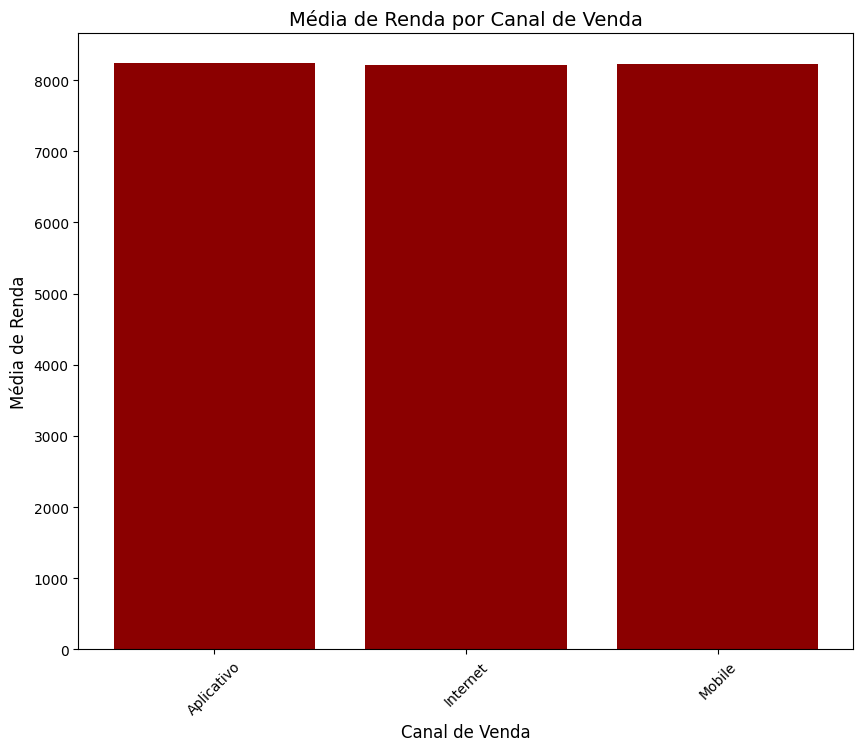

In [28]:
#definindo resposta
media_renda_canal = vendas.groupby("idcanalvenda")["renda"].mean().rename("Media_Renda").reset_index()
# Criar o gráfico de barras
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
plt.bar(media_renda_canal["idcanalvenda"], media_renda_canal["Media_Renda"], color="darkred")

# Adicionar título e rótulos
plt.title("Média de Renda por Canal de Venda", fontsize=14)
plt.xlabel("Canal de Venda", fontsize=12)
plt.ylabel("Média de Renda", fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os nomes dos canais se necessário

# Exibir o gráfico
plt.show()

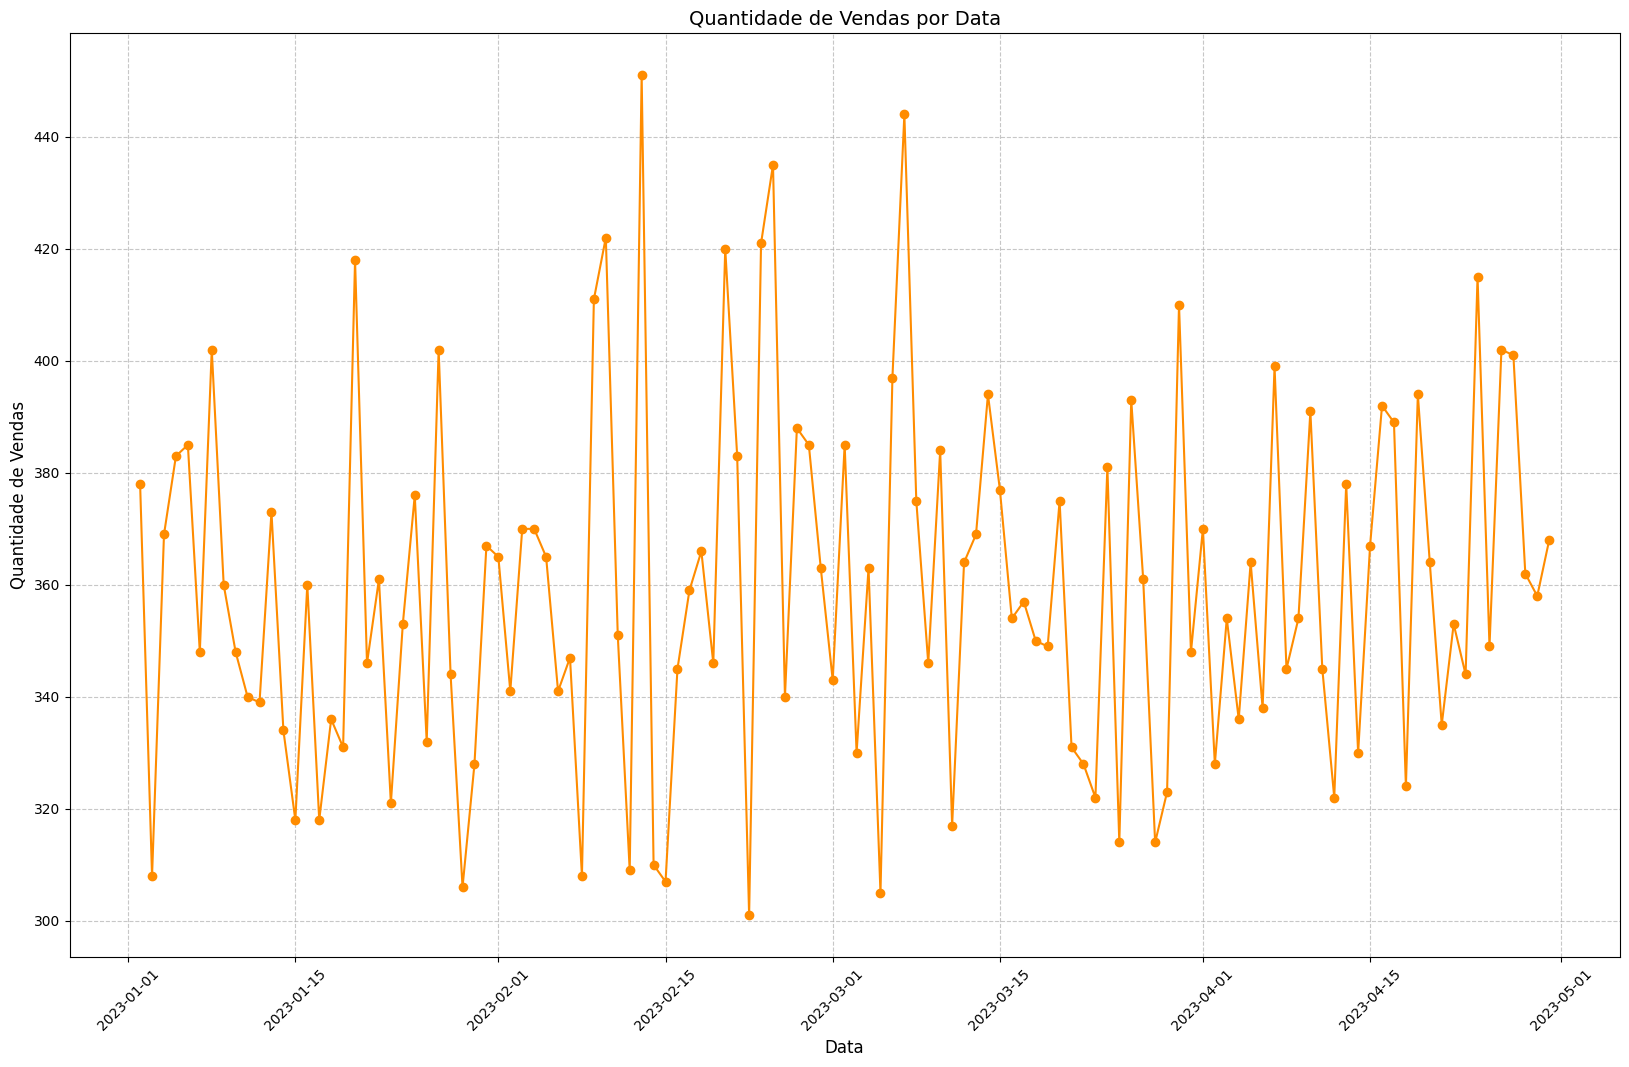

In [29]:


# Converter a coluna "Data" para formato de data, caso ainda não esteja
vendas["Data"] = pd.to_datetime(vendas["Data"])

# Agrupar e contar a quantidade de vendas por data completa
vendas_por_data = (
    vendas.groupby("Data")["idcompra"]  # Agrupa os dados pela data completa
    .count()  # Conta o número de vendas em cada data
    .rename("Quantidade_Vendas")  # Renomeia a coluna para melhor identificação
    .reset_index()  # Reseta o índice para manter o DataFrame organizado
)

# Criar o gráfico de linhas
plt.figure(figsize=(20, 12))  # Define o tamanho da figura
plt.plot(vendas_por_data["Data"], vendas_por_data["Quantidade_Vendas"], marker="o", linestyle="-", color="darkorange")

# Adicionar título e rótulos
plt.title("Quantidade de Vendas por Data", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True, linestyle="--", alpha=0.7)  # Adiciona uma grade para facilitar a leitura

# Exibir o gráfico
plt.show()



In [30]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [31]:
import  cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [32]:
# Criar o gráfico de barras interativo com Plotly Express
fig = px.bar(
    media_idade_bandeira,  # DataFrame usado no gráfico
    x="bandeira",  # Eixo X: Bandeira
    y="Media_Idade",  # Eixo Y: Média de idade
    title="Média de Idade dos Clientes por Bandeira",  # Título do gráfico
    labels={"bandeira": "Bandeira", "Media_Idade": "Média de Idade"},  # Rótulos dos eixos
    color="Media_Idade",  # Adiciona cor baseada na média de idade
    color_continuous_scale="Blues"  # Define a escala de cores em tons de azul
)

# Exibir o gráfico
fig.show()

In [33]:
# Criar o gráfico de linhas interativo com Plotly Express
fig = px.line(
    vendas_por_data,  # DataFrame usado no gráfico
    x="Data",  # Eixo X: Data
    y="Quantidade_Vendas",  # Eixo Y: Quantidade de vendas
    title="Quantidade de Vendas por Data",  # Título do gráfico
    labels={"Data": "Data", "Quantidade_Vendas": "Quantidade de Vendas"},  # Rótulos dos eixos
    markers=True,  # Adiciona marcadores nos pontos do gráfico
    line_shape="linear",  # Define o formato da linha como linear
    color_discrete_sequence=["darkorange"]  # Define a cor da linha
)

# Exibir o gráfico interativo
fig.show()